@ https://www.kaggle.com/datasets/minahilfatima12328/lifestyle-and-sleep-patterns

In [1]:
import pandas as pd
import numpy as np

In [2]:
sleepdataset = pd.read_csv('sleephealth_dataset.csv')
sleepdataset.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [3]:
sleepdataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [4]:
df = sleepdataset.copy()

In [5]:
df.duplicated().sum()

np.int64(0)

In [6]:
catcols = df.select_dtypes(include='object').columns.tolist()
numcols = df.select_dtypes(include=['int64','float64']).columns.tolist()

print("Categorical Columns: ", catcols)
print("Numerical Columns: ", numcols)

Categorical Columns:  ['Gender', 'Occupation', 'BMI Category', 'Blood Pressure', 'Sleep Disorder']
Numerical Columns:  ['Person ID', 'Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps']


In [7]:
df['Male'] = df['Gender'].map({'Male': 1, 'Female': 0})
df.drop('Gender', axis=1, inplace=True)

In [8]:
df["Sleep Disorder"].unique()

array([nan, 'Sleep Apnea', 'Insomnia'], dtype=object)

In [9]:
df['Sleep Apnea'] = (df['Sleep Disorder'] == 'Sleep Apnea').astype(int)
df['Insomnia'] = (df['Sleep Disorder'] == 'Insomnia').astype(int)
df.drop('Sleep Disorder', axis=1, inplace=True)

In [10]:
df["BMI Category"].unique()

array(['Overweight', 'Normal', 'Obese', 'Normal Weight'], dtype=object)

In [11]:
df["BMI_Code"] = df['BMI Category'].map({'Overweight': 1, 'Obese': 2, 'Normal': 0, 'Normal Weight': 0})
df.drop('BMI Category', axis=1, inplace=True)

In [12]:
helper = df["Blood Pressure"].str.split('/')
df["Systolic BP"] = helper.str[0].astype(float)
df["Diastolic BP"] = helper.str[1].astype(float)
df.drop('Blood Pressure', axis=1, inplace=True)
del helper

In [13]:
df["Occupation"].unique()

array(['Software Engineer', 'Doctor', 'Sales Representative', 'Teacher',
       'Nurse', 'Engineer', 'Accountant', 'Scientist', 'Lawyer',
       'Salesperson', 'Manager'], dtype=object)

In [14]:
df.drop("Person ID", axis=1, inplace=True)

In [15]:
df.head()

,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Male,Sleep Apnea,Insomnia,BMI_Code,Systolic BP,Diastolic BP
0,27,Software Engineer,6.1,6,42,6,77,4200,1,0,0,1,126.0,83.0
1,28,Doctor,6.2,6,60,8,75,10000,1,0,0,0,125.0,80.0
2,28,Doctor,6.2,6,60,8,75,10000,1,0,0,0,125.0,80.0
3,28,Sales Representative,5.9,4,30,8,85,3000,1,1,0,2,140.0,90.0
4,28,Sales Representative,5.9,4,30,8,85,3000,1,1,0,2,140.0,90.0


In [16]:
catcols = df.select_dtypes(include='object').columns.tolist()
numcols = df.select_dtypes(include=['int64','float64']).columns.tolist()

print("Categorical Columns: ", catcols)
print("Numerical Columns: ", numcols)

Categorical Columns:  ['Occupation']
Numerical Columns:  ['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps', 'Male', 'Sleep Apnea', 'Insomnia', 'BMI_Code', 'Systolic BP', 'Diastolic BP']


In [17]:
df.isnull().sum()/df.shape[0] * 100

Age                        0.0
Occupation                 0.0
Sleep Duration             0.0
Quality of Sleep           0.0
Physical Activity Level    0.0
Stress Level               0.0
Heart Rate                 0.0
Daily Steps                0.0
Male                       0.0
Sleep Apnea                0.0
Insomnia                   0.0
BMI_Code                   0.0
Systolic BP                0.0
Diastolic BP               0.0
dtype: float64

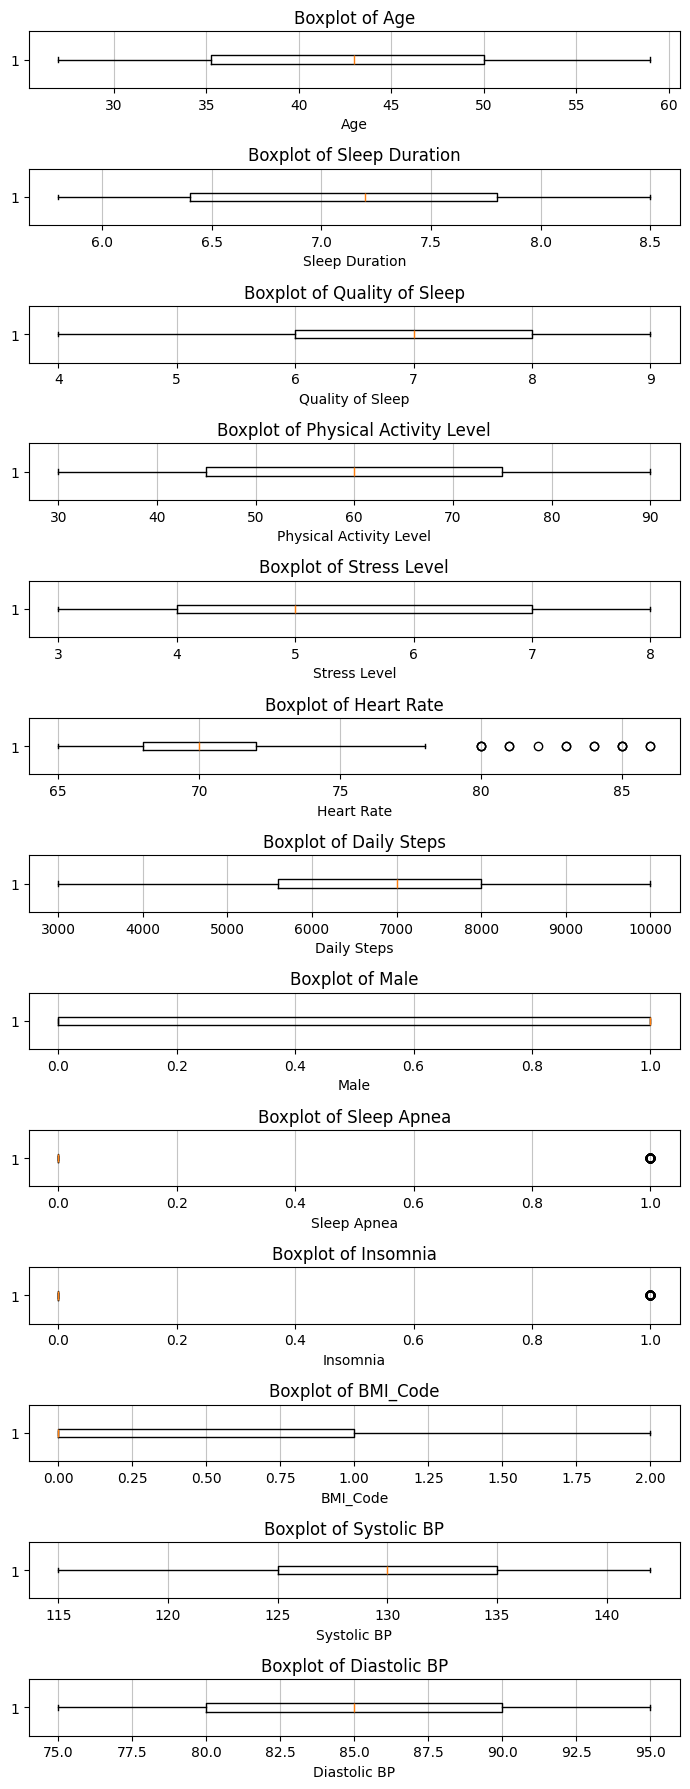

In [18]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(len(numcols), 1, figsize=(7, 18))

for index, col in enumerate(numcols):
    ax[index].boxplot(df[col], vert=False)
    ax[index].set_title(f'Boxplot of {col}')
    ax[index].set_xlabel(col)
    ax[index].grid(axis='x', alpha=0.75)
plt.tight_layout()
plt.show()



In [19]:
#Heart Rate
q1 = df['Heart Rate'].quantile(0.25)
q3 = df['Heart Rate'].quantile(0.75)

iqr = q3 - q1
lower_bound = q1 - 3 * iqr
upper_bound = q3 + 3 * iqr


df_processed = df[(df['Heart Rate'] >= lower_bound) & (df['Heart Rate'] <= upper_bound)]
print(f"Heart Rate outliers removed: {len(df)}")

Heart Rate outliers removed: 374


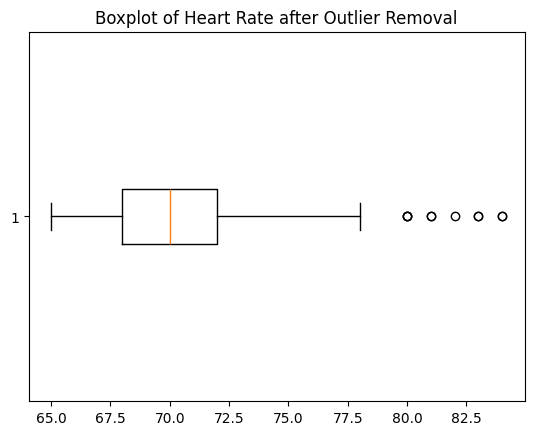

In [20]:
plt.boxplot(df_processed['Heart Rate'], vert=False)
plt.title('Boxplot of Heart Rate after Outlier Removal')
plt.show()

In [21]:
df_processed.head()

,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Male,Sleep Apnea,Insomnia,BMI_Code,Systolic BP,Diastolic BP
0,27,Software Engineer,6.1,6,42,6,77,4200,1,0,0,1,126.0,83.0
1,28,Doctor,6.2,6,60,8,75,10000,1,0,0,0,125.0,80.0
2,28,Doctor,6.2,6,60,8,75,10000,1,0,0,0,125.0,80.0
6,29,Teacher,6.3,6,40,7,82,3500,1,0,1,2,140.0,90.0
7,29,Doctor,7.8,7,75,6,70,8000,1,0,0,0,120.0,80.0


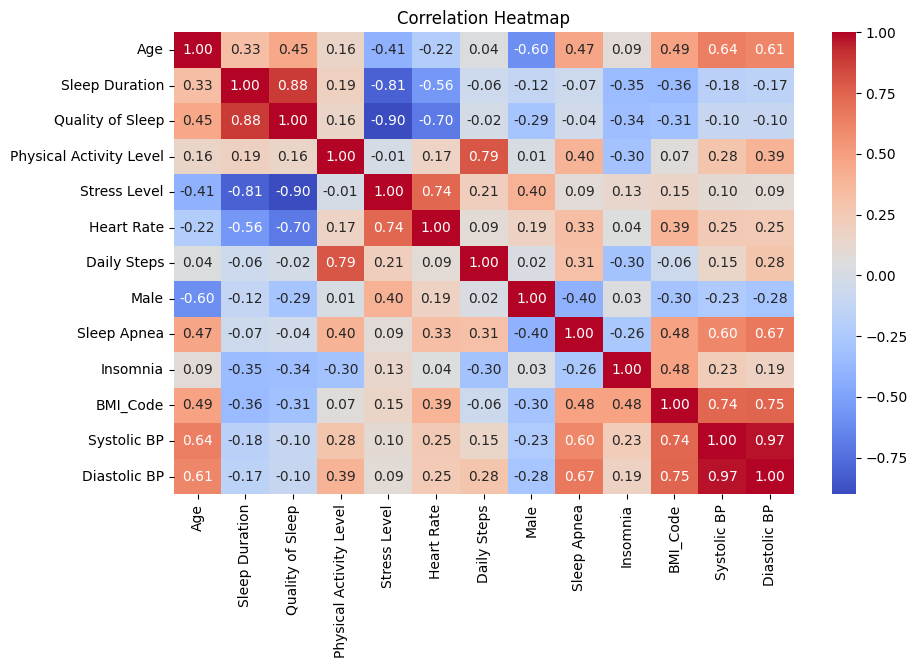

In [22]:
import seaborn as sns
correlation_ = df_processed[numcols].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap')
plt.show()

In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

stdscaler = StandardScaler()
df_processed["Daily Steps"] = stdscaler.fit_transform(df_processed[["Daily Steps"]])
df_processed["Heart Rate"] = stdscaler.fit_transform(df_processed[["Heart Rate"]])
df_processed["Systolic BP"] = stdscaler.fit_transform(df_processed[["Systolic BP"]])
df_processed["Diastolic BP"] = stdscaler.fit_transform(df_processed[["Diastolic BP"]])
df_processed["Sleep Duration"] = stdscaler.fit_transform(df_processed[["Sleep Duration"]])

mmscaler = MinMaxScaler()
df_processed["Age"] = mmscaler.fit_transform(df_processed[["Age"]])



C:\Users\Kodithuwakku\AppData\Local\Temp\ipykernel_7796\1248824068.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_processed["Daily Steps"] = stdscaler.fit_transform(df_processed[["Daily Steps"]])
C:\Users\Kodithuwakku\AppData\Local\Temp\ipykernel_7796\1248824068.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_processed["Heart Rate"] = stdscaler.fit_transform(df_processed[["Heart Rate"]])
C:\Users\Kodithuwakku\AppData\Local\Temp\ipykernel_7796\1248824068.py:7: SettingWithCopyWarning: 
A value 

In [ ]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output= False, drop=None)
occupation_encoded = encoder.fit_transform(df_processed[['Occupation']])

In [25]:
occupation_encoded

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(369, 10))

In [26]:
occupation_encoded_df = pd.concat([df_processed.reset_index(drop=True), pd.DataFrame(occupation_encoded, columns=encoder.get_feature_names_out(['Occupation']))], axis=1)
occupation_encoded_df.drop('Occupation', axis=1, inplace=True)

In [30]:
occupation_encoded_df.head()

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Male,Sleep Apnea,Insomnia,...,Occupation_Accountant,Occupation_Doctor,Occupation_Engineer,Occupation_Lawyer,Occupation_Manager,Occupation_Nurse,Occupation_Salesperson,Occupation_Scientist,Occupation_Software Engineer,Occupation_Teacher
0,0.00000,-1.314173,6,42,6,1.875100,-1.694649,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.03125,-1.187427,6,60,8,1.342451,1.993836,1,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.03125,-1.187427,6,60,8,1.342451,1.993836,1,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.06250,-1.060681,6,40,7,3.206725,-2.139811,1,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.06250,0.840507,7,75,6,0.010826,0.721945,1,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
Y = occupation_encoded_df['Stress Level']
X = occupation_encoded_df.drop(['Stress Level'], axis=1)

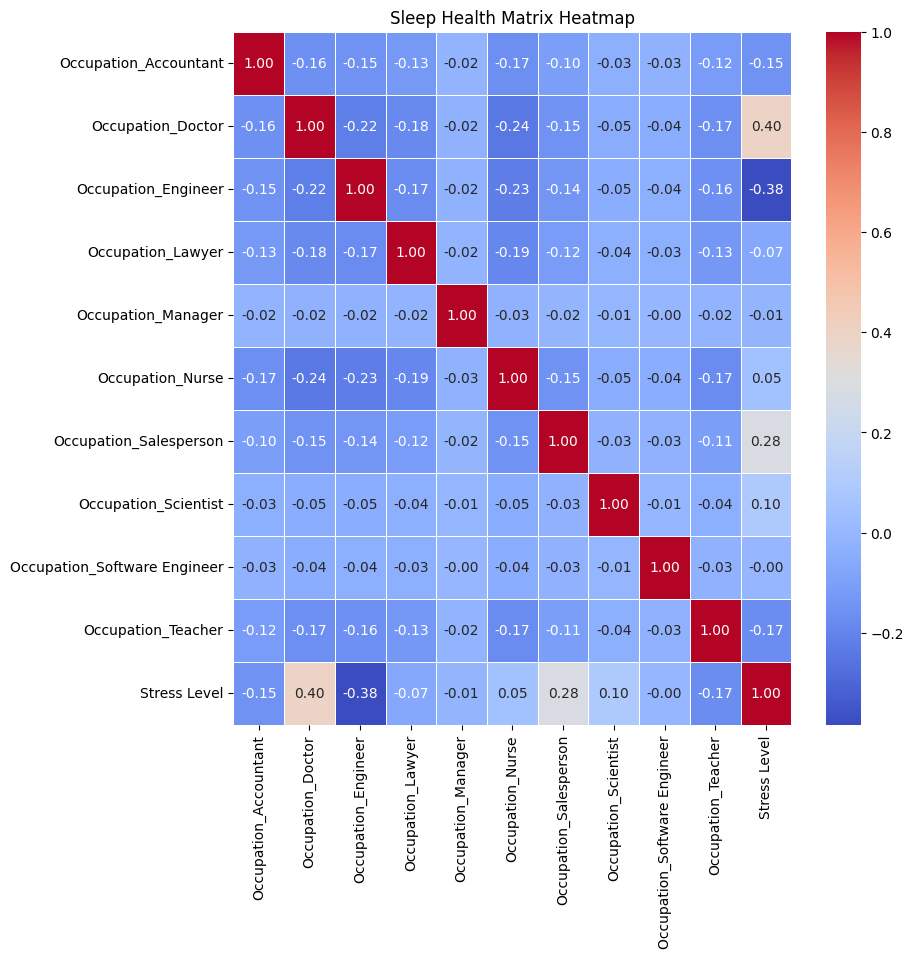

In [33]:
corrdata = pd.concat([pd.DataFrame(occupation_encoded, columns=encoder.get_feature_names_out(['Occupation'])), Y.reset_index(drop=True)], axis=1).corr()
plt.figure(figsize=(9, 9)) 
sns.heatmap(corrdata, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Sleep Health Matrix Heatmap')
plt.show()